In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import taxopy

In [95]:
df = pd.read_csv('data/report.N23.txt', sep='\t', header=None)
df

,0,1,2,3,4,5
0,24.71,6769450,6769450,U,0,unclassified
1,75.29,20626790,5482,R,1,root
2,75.24,20612604,23206,R1,131567,cellular organisms
3,64.78,17746608,2581,R2,2759,Eukaryota
4,64.73,17734691,0,R3,33154,Opisthokonta
...,...,...,...,...,...,...
20512,0.00,5,0,O,1511857,Ligamenvirales
20513,0.00,5,0,F,157897,Rudiviridae
20514,0.00,5,0,G,2842391,Azorudivirus
20515,0.00,5,0,S,2843747,Azorudivirus SRV


In [96]:
df[5] = df[5].str.replace(' ', '')

In [97]:
unclassified = df.iloc[0][0]
filtered_df = df[(df[3].isin(["R2", "U"])) & (df[0] > 0)]

In [ ]:
# Remove the row where column 5 is "Eukaryota"
filtered_df = filtered_df[filtered_df[5] != "Eukaryota"]

# Add rows where column 5 is "Canis lupus familiaris", "Ursus arctos" or "Homo sapiens"
new_rows = df[df[5].isin([
    "Canislupusfamiliaris",
    "Ursusarctos",
    "Homosapiens"])]

filtered_df = pd.concat([filtered_df, new_rows])
filtered_df

,0,1,2,3,4,5
0,24.71,6769450,6769450,U,0,unclassified
229,10.34,2831620,98599,R2,2,Bacteria
17986,0.04,11170,3,R2,2157,Archaea
18882,0.03,7023,7023,R2,28384,othersequences
29,64.39,17639433,17639433,S1,9615,Canislupusfamiliaris
32,0.20,55948,55948,S,9644,Ursusarctos
42,0.05,14515,14515,S,9606,Homosapiens


In [99]:
total_abundance = filtered_df[0].sum()

In [108]:
samples = ["CX113C","CX113E","CX113F","CX113H","CX115H","CX1138","Neige_2_3","Neige_3_2","Neige_4"]
taxa = ["Bear", "Bear", "Wolf", "Wolf", "Bear", "Bear", "Wolf", "Wolf", "Wolf"]

In [116]:
df_all = pd.DataFrame(columns=["unclassified", "Canislupusfamiliaris", "Ursusarctos", "Homosapiens", "Bacteria", "Archaea", "Duplodnaviria"])

for i in range(len(samples)):
    df=pd.read_csv(f"./data/report.{samples[i]}.txt", sep='\t', header=None)
    #remove leading spaces
    df[5] = df[5].str.replace(' ', '')
    #keep only superkingdoms
    filtered_df = df[(df[3].isin(["R2", "U"])) & (df[0] > 0)]
    # Remove the row where column 5 is "Eukaryota"
    filtered_df = filtered_df[filtered_df[5] != "Eukaryota"]
    # Add rows where column 5 is "Canis lupus familiaris", "Ursus arctos" or "Homo sapiens"
    new_rows = df[df[5].isin([
        "Canislupusfamiliaris",
        "Ursusarctos",
        "Homosapiens"])]

    filtered_df = pd.concat([filtered_df, new_rows])

    for name in df_all.columns:
        if name in filtered_df[5].values:
            df_all.loc[i, name] = filtered_df[filtered_df[5] == name][0].values[0]
        else:
            df_all.loc[i, name] = 0

df_all

,unclassified,Canislupusfamiliaris,Ursusarctos,Homosapiens,Bacteria,Archaea,Duplodnaviria
0,56.39,0.09,0.35,0.04,42.69,0.12,0.01
1,61.44,0.06,0.52,0.04,37.54,0.15,0.01
2,55.23,0.32,0.02,0.03,44.04,0.12,0.01
3,53.29,0.09,0.01,0.01,46.13,0.13,0.01
4,63.21,0.08,0.05,0.05,36.16,0.16,0.01
5,61.03,0.1,1.38,0.16,36.7,0.15,0.02
6,24.71,64.39,0.2,0.05,10.34,0.04,0
7,61.45,0.23,0.02,0.02,37.93,0.1,0.01
8,51.77,0.11,0.01,0.02,47.73,0.08,0.01


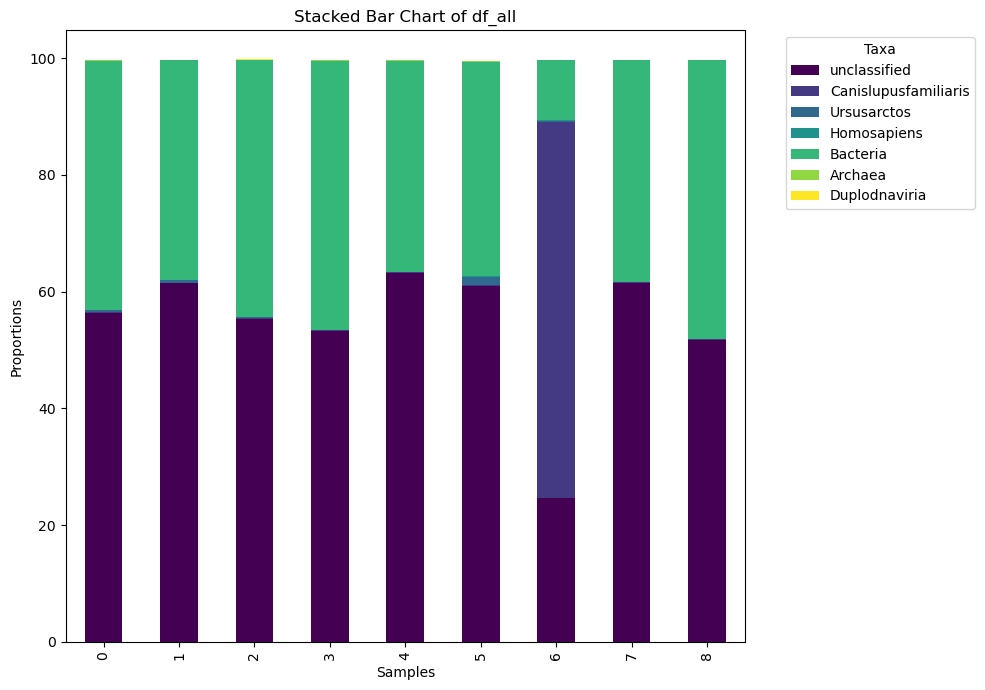

In [117]:
# Convert the columns to numeric values
df_all = df_all.apply(pd.to_numeric)

# Plot the stacked bar chart
ax = df_all.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')

# Set the labels and title
ax.set_xlabel('Samples')
ax.set_ylabel('Proportions')
ax.set_title('Stacked Bar Chart of df_all')

# Show the legend
ax.legend(title='Taxa', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()